In [1]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
i5S = pd.read_csv('../../I15S_data2.csv')
i5S

Unnamed: 0            Timestamp  Station  District  Freeway #  \
0                 0  2015-01-01 00:00:00  1108148        11         15   
1                 1  2015-01-01 00:05:00  1108148        11         15   
2                 2  2015-01-01 00:10:00  1108148        11         15   
3                 3  2015-01-01 00:15:00  1108148        11         15   
4                 4  2015-01-01 00:20:00  1108148        11         15   
5                 5  2015-01-01 00:25:00  1108148        11         15   
6                 6  2015-01-01 00:30:00  1108148        11         15   
7                 7  2015-01-01 00:35:00  1108148        11         15   
8                 8  2015-01-01 00:40:00  1108148        11         15   
9                 9  2015-01-01 00:45:00  1108148        11         15   
10               10  2015-01-01 00:50:00  1108148        11         15   
11               11  2015-01-01 00:55:00  1108148        11         15   
12               12  2015-01-01 01:00:00  1108148        11         15   
13               13  2015-01-01 01:05:00  1108148        11         15   
14               14  2015-01-01 01:10:00  1108148        11         15   
15               15  2015-01-01 01:15:00  1108148        11         15   
16               16  2015-01-01 01:20:00  1108148        11         15   
17               17  2015-01-01 01:25:00  1108148        11         15   
18               18  2015-01-01 01:30:00  1108148        11         15   
19               19  2015-01-01 01:35:00  1108148        11         15   
20               20  2015-01-01 01:40:00  1108148        11         15   
21               21  2015-01-01 01:45:00  1108148        11         15   
22               22  2015-01-01 01:50:00  1108148        11         15   
23               23  2015-01-01 01:55:00  1108148        11         15   
24               24  2015-01-01 02:00:00  1108148        11         15   
25               25  2015-01-01 02:05:00  1108148        11         15   
26               26  2015-01-01 02:10:00  1108148        11         15   
27               27  2015-01-01 02:15:00  1108148        11         15   
28               28  2015-01-01 02:20:00  1108148        11         15   
29               29  2015-01-01 02:25:00  1108148        11         15   
...             ...                  ...      ...       ...        ...   
6935500     6935500  2015-12-31 21:30:00  1125879        11         15   
6935501     6935501  2015-12-31 21:35:00  1125879        11         15   
6935502     6935502  2015-12-31 21:40:00  1125879        11         15   
6935503     6935503  2015-12-31 21:45:00  1125879        11         15   
6935504     6935504  2015-12-31 21:50:00  1125879        11         15   
6935505     6935505  2015-12-31 21:55:00  1125879        11         15   
6935506     6935506  2015-12-31 22:00:00  1125879        11         15   
6935507     6935507  2015-12-31 22:05:00  1125879        11         15   
6935508     6935508  2015-12-31 22:10:00  1125879        11         15   
6935509     6935509  2015-12-31 22:15:00  1125879        11         15   
6935510     6935510  2015-12-31 22:20:00  1125879        11         15   
6935511     6935511  2015-12-31 22:25:00  1125879        11         15   
6935512     6935512  2015-12-31 22:30:00  1125879        11         15   
6935513     6935513  2015-12-31 22:35:00  1125879        11         15   
6935514     6935514  2015-12-31 22:40:00  1125879        11         15   
6935515     6935515  2015-12-31 22:45:00  1125879        11         15   
6935516     6935516  2015-12-31 22:50:00  1125879        11         15   
6935517     6935517  2015-12-31 22:55:00  1125879        11         15   
6935518     6935518  2015-12-31 23:00:00  1125879        11         15   
6935519     6935519  2015-12-31 23:05:00  1125879        11         15   
6935520     6935520  2015-12-31 23:10:00  1125879        11         15   
6935521     6935521  2015-12-31 23:15:00  1125879        11         15   
6935522     6

# Wiggles - Occupancy, Flow and Speed
### Average across all stations

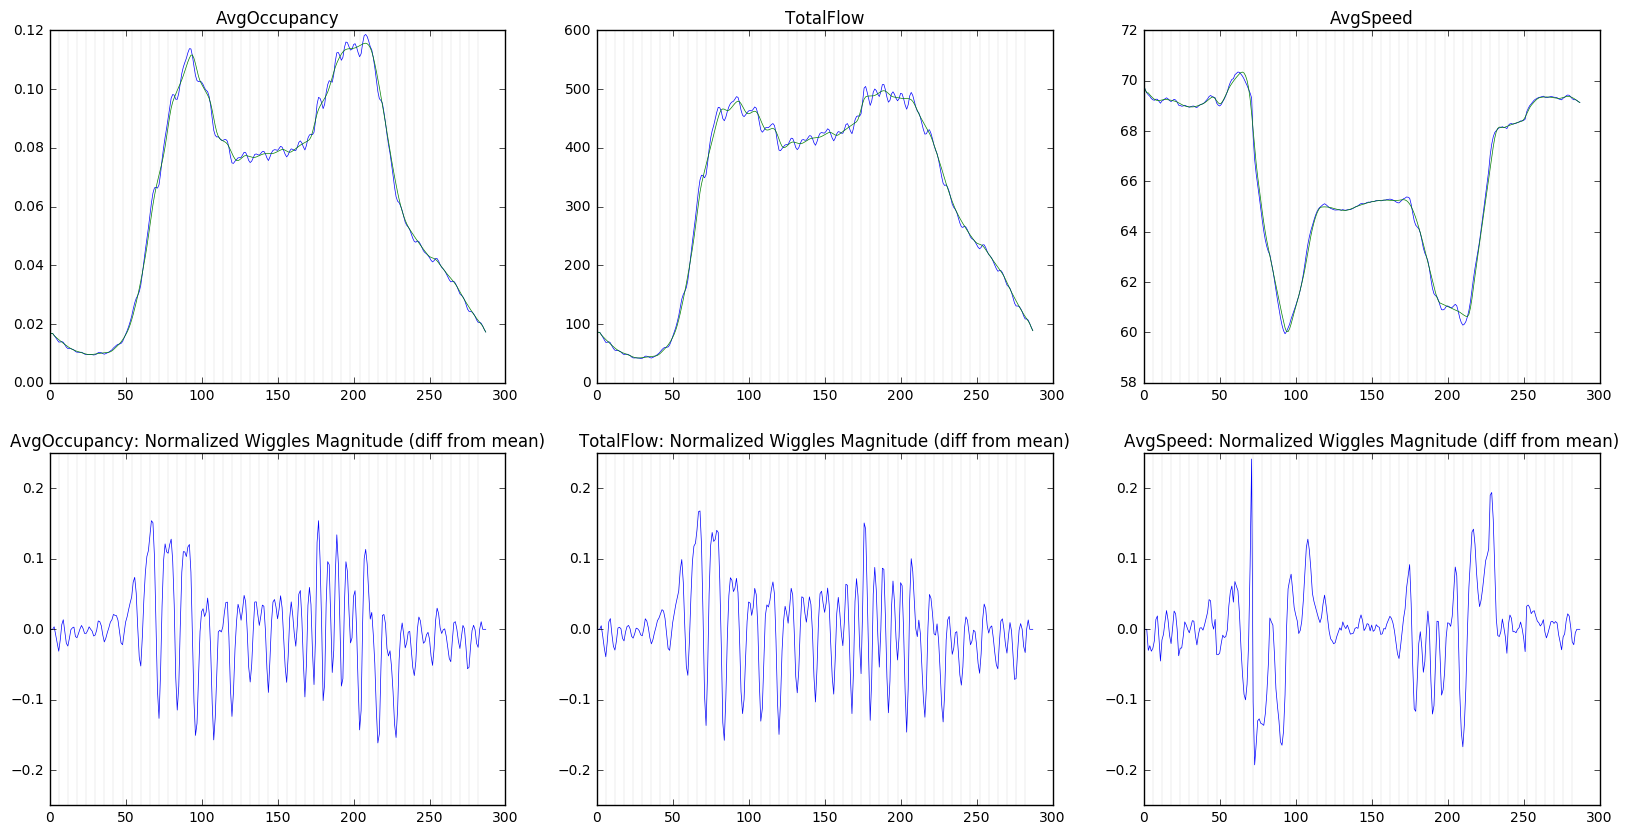

In [8]:
from altair import *
import analyzeWiggles as aw

fig = plt.figure(figsize = (20,10))
metrics = ['AvgOccupancy', 'TotalFlow', 'AvgSpeed']

for i,m in enumerate(metrics):
    mv = np.array(i5S[['Time',m]].groupby(['Time']).mean()[m])
    vectors = aw.smooth_vector(mv, 'akima', 6)

    ax = fig.add_subplot(2, 3, i+1)
    plt.plot(vectors['meanVector'], linewidth=.5)
    plt.plot(vectors['timelabels'], vectors['smoothedVector'], linewidth=.5)
    for j in range(0,288,12):
        plt.axvline(x=j, linewidth=.1, color='gray')
        plt.axvline(x=j+6, linewidth=.1, color='gray')
    plt.title(m)

    ax = fig.add_subplot(2, 3, i+4)
    plt.plot(vectors['timelabels'],vectors['diffVector'], color="blue", linewidth=.5)
    plt.title(m +": Normalized Wiggles Magnitude (diff from mean)")
    plt.ylim((-.25,.25))
    for i in range(0,288,12):
        plt.axvline(x=i, linewidth=.1, color='gray')
        plt.axvline(x=i+6, linewidth=.1, color='gray')

plt.show()

#  By Station
### Using Rank1 stations - Station By Station Analysis
https://github.com/mas-dse-c6sander/DSE_Cohort2_Traffic_Capstone/wiki/List-of-Stations-in-rank-order-for-2015

In [266]:
stations = list(i5S['Station'].unique())[0]
station_latlon = i5S[['Station', 'Latitude', 'Longitude']].groupby(['Station']).max()

In [216]:
#Rank1 Stations:
rank1 = [1108313, 1108315, 1108317, 1108328, 1108331, 1108339, 1108341, 1108343, 1108351, 1108353, 1108360, 
         1108372, 1108389, 1108401, 1108413, 1108419, 1108421, 1108423, 1108427, 1108429, 1108465, 1108473, 
         1108486, 1108512, 1108523, 1108531, 1108543, 1108547, 1108560, 1108562, 1108564, 1108572, 1108582, 
         1108592, 1108597, 1108623, 1108625, 1108627, 1108649, 1108661, 1108687, 1108693, 1108700, 1108717, 
         1108728, 1108739, 1108741, 1108743, 1108745, 1108760, 1111514, 1111526, 1111531, 1111535, 1111557, 
         1111569, 1111570, 1111575, 1112989, 1113126, 1113138, 1113147, 1113292, 1113318, 1113364, 1113720, 
         1113740, 1115240, 1115450, 1115486, 1115537, 1115612, 1115616, 1115624, 1115649, 1115656, 1115663, 
         1115721, 1115739, 1115771, 1115779, 1115787, 1115811, 1115820, 1115838, 1115897, 1115921, 1115929, 
         1115937, 1115946, 1116092, 1116098, 1116119, 1116133, 1116139, 1116145, 1116158, 1116318, 1117836, 
         1117850, 1117899, 1118013, 1118170, 1118260, 1118521, 1118529, 1118707, 1118796, 1118957, 1119528, 
         1119645, 1119653, 1119679, 1119683, 1119689, 1119694, 1119699, 1119749, 1119762, 1119842, 1119850, 
         1119865, 1119871, 1119890, 1119897, 1119934, 1119947, 1119954, 1119960, 1119966, 1119972, 1119978, 
         1119984, 1119990, 1119997, 1120356, 1120362, 1121037, 1121038, 1121105, 1121112, 1121118, 1122394, 
         1122469, 1122479, 1122507, 1122552, 1122560, 1122575, 1122594, 1122645, 1122646, 1123030, 1123031, 
         1123078, 1123081, 1125314, 1125348, 1125353, 1125689, 1125836, 1125865, 1125872, 1125879]

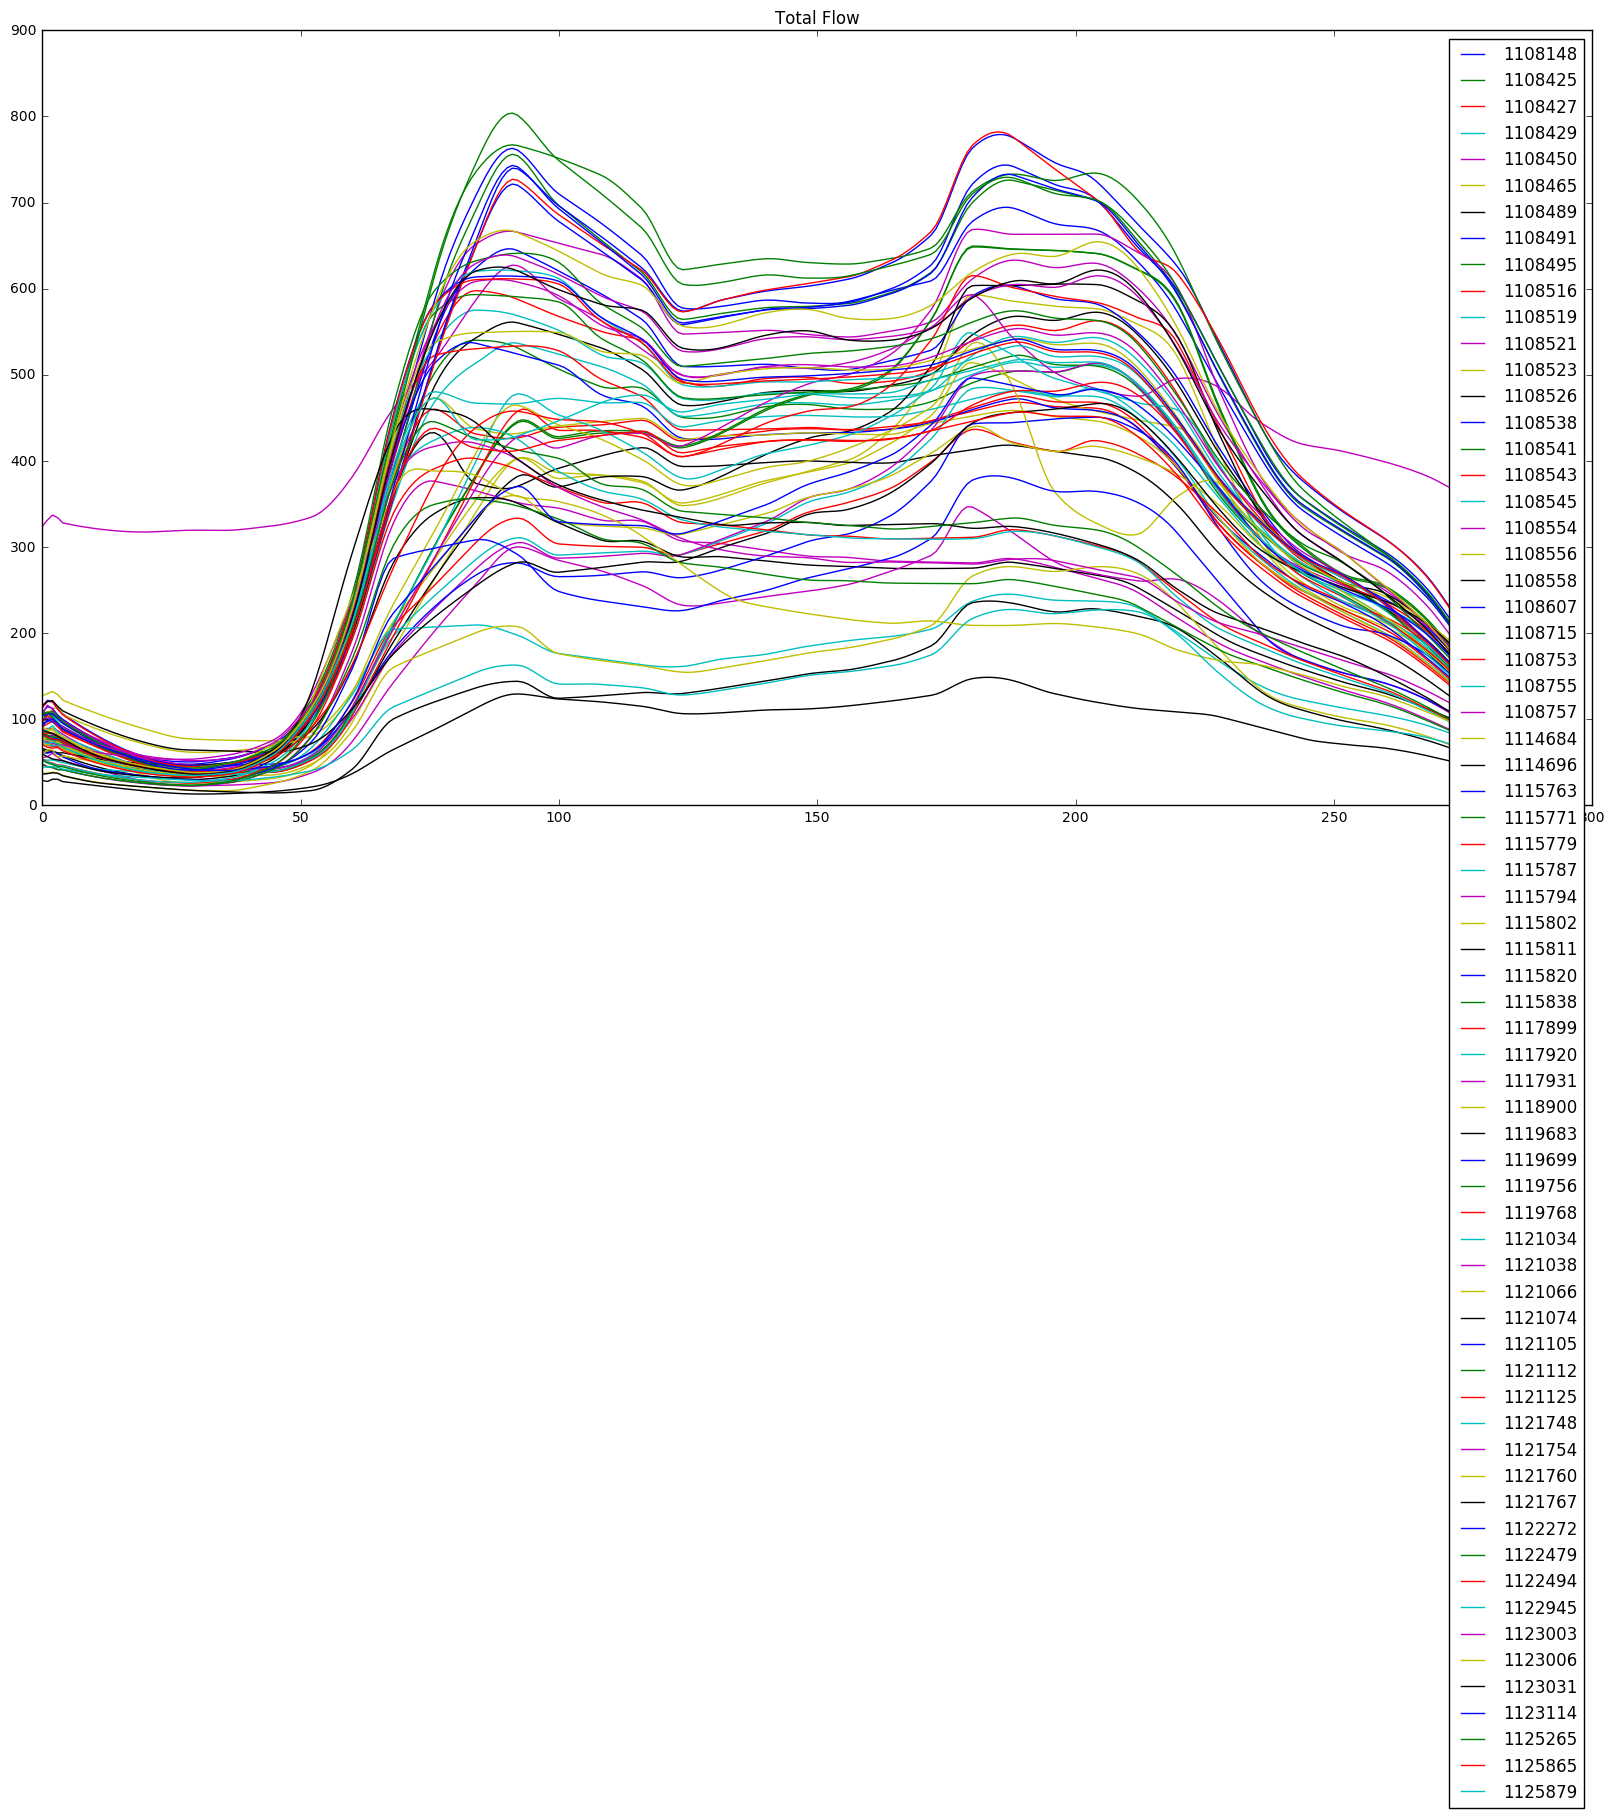

In [279]:
fig = plt.figure(figsize = (20,10))
stations = list(i5S['Station'].unique())[0]

station_latlong = i5S[['Station','Latitude', 'Longitude']]
lat_max =  station_latlong['Latitude'].max()
lon_max =  station_latlong['Longitude'].max()
lat_min =  station_latlong['Latitude'].min()
lon_min =  station_latlong['Longitude'].min()

df = {}
for s in list(i5S['Station'].unique()):
    #if s in rank1:

    data = i5S[i5S['Station'] == s]
    mv = np.array(data[['Time','TotalFlow']].groupby(['Time']).mean()['TotalFlow'])
    vectors = aw.smooth_vector(mv, 'akima', 8)
    df_temp = pd.DataFrame.from_records(vectors)
    df_temp['station'] = s
    lat = station_latlon[station_latlon.index == s]['Latitude'].values[0]
    lon = station_latlon[station_latlon.index == s]['Longitude'].values[0]
    lat_norm = (lat_max-lat)/(lat_max-lat_min)
    lon_norm = (lon_max-lon)/(lon_max-lon_min)
    df_temp['lat_norm'] = lat_norm
    df_temp['lon_norm'] = lon_norm
    df_temp['lat'] = lat
    df_temp['lon'] = lon
    #print lat, lon
    try:
        df = pd.concat([df_temp, df], axis=0)
    except:
        df = df_temp
    plt.plot(df_temp['timelabels'], df_temp['smoothedVector'], label=s)
    
#df
plt.title('Total Flow')
plt.legend()
plt.show()

df.to_csv('wiggles.csv')

# Wiggles for Each Rank1 Station, Colored (diverging)

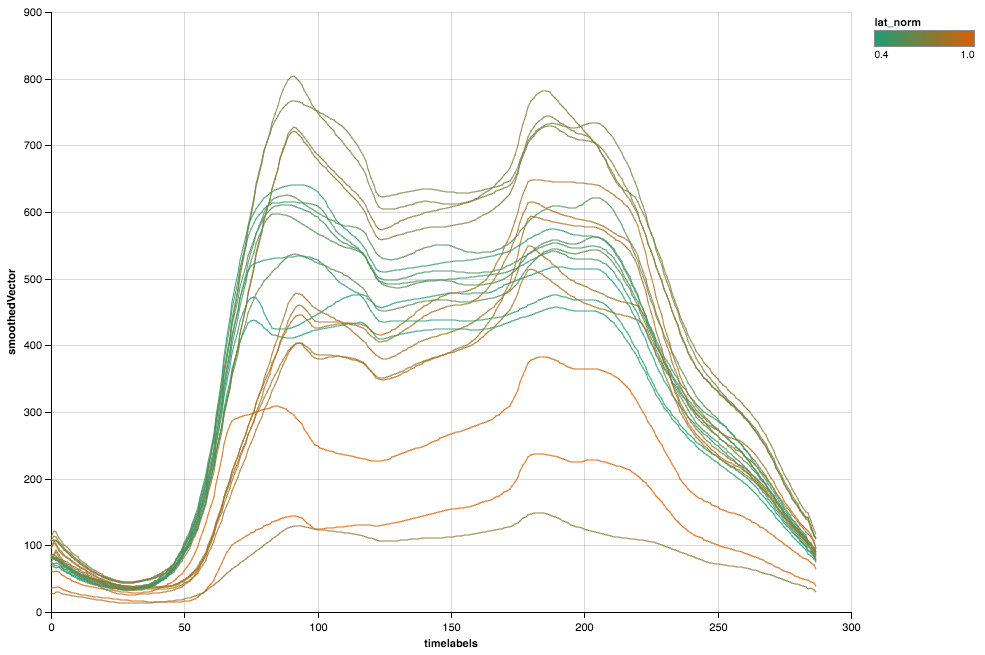

In [262]:
#!pip install palettable # for brewer color maps
from altair import *
from palettable import colorbrewer as cb  

chart = Chart(df).mark_line(size=1, strokeWidth=.9).encode(y='smoothedVector', 
                             x='timelabels', 
                             color=Color('lat_norm', scale=Scale(range=cb.qualitative.Dark2_8.hex_colors))
                            )

chart.configure_cell(height=600, width=800)
chart


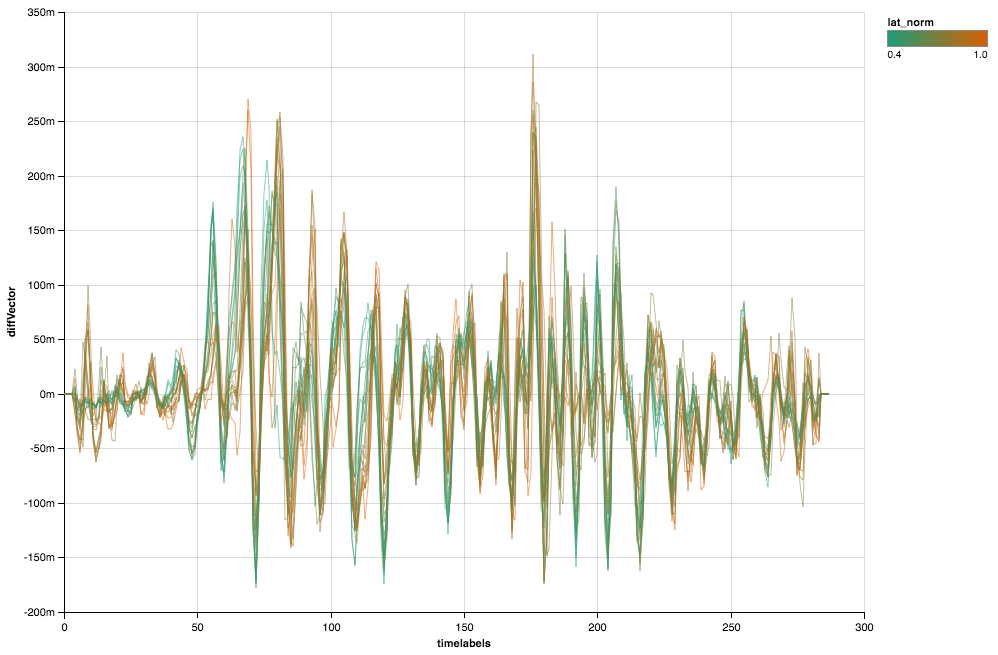

In [275]:
chart2 = Chart(df).mark_line(size=1, strokeWidth=.5).encode(y='diffVector', 
                          x='timelabels', 
                          color=Color('lat_norm', scale=Scale(range=cb.qualitative.Dark2_8.hex_colors)))

chart2.configure_cell(height=600, width=800)
chart2